Import all your packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

/var/folders/67/w34t7wgn6_s13hb551pyr9vc0000gn/T/ipykernel_96744/2074160962.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


Load the dataset

In [2]:
students_df = pd.read_csv("StudentsPerformance.csv")
students_df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Overview of the dataset

In [3]:
print("Dataset shape:", students_df.shape)
print("Columns:", students_df.columns)

Dataset shape: (1000, 8)
Columns: Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')


Any data cleaning or preprocessing we could do here
e.g. Encoding of categorical data, dropping columns etc

In [7]:
dropped = students_df[['gender', 'math score', 'reading score', 'writing score']]
dropped.head()

,gender,math score,reading score,writing score
0,female,72,72,74
1,female,69,90,88
2,female,90,95,93
3,male,47,57,44
4,male,76,78,75


## Univariate Analysis

### Descriptive Stats

In [8]:
dropped.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


### Visualisation of Descriptive Stats

#### Histograms

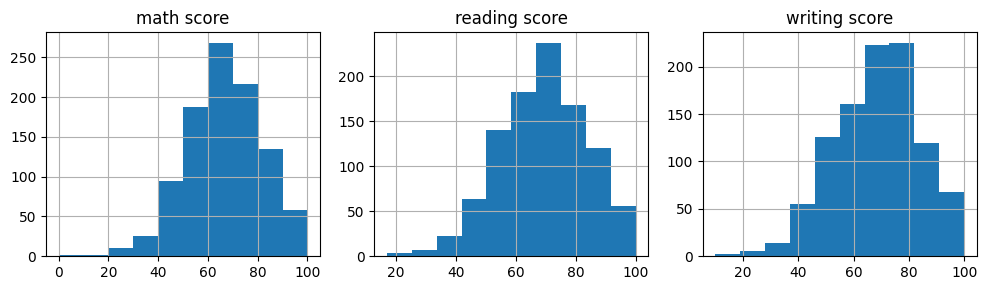

In [5]:
students_df.hist(figsize=(10, 3), layout=(1,3))
plt.tight_layout()
plt.show()

#### Boxplots

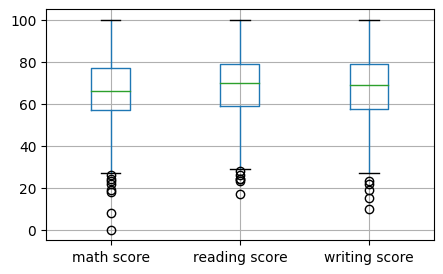

Missing values: gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64


In [12]:
students_df.boxplot(figsize=(5, 3))
plt.show()
print("Missing values:", students_df.isnull().sum())

### Bivariate Analysis

#### Scatter Plots

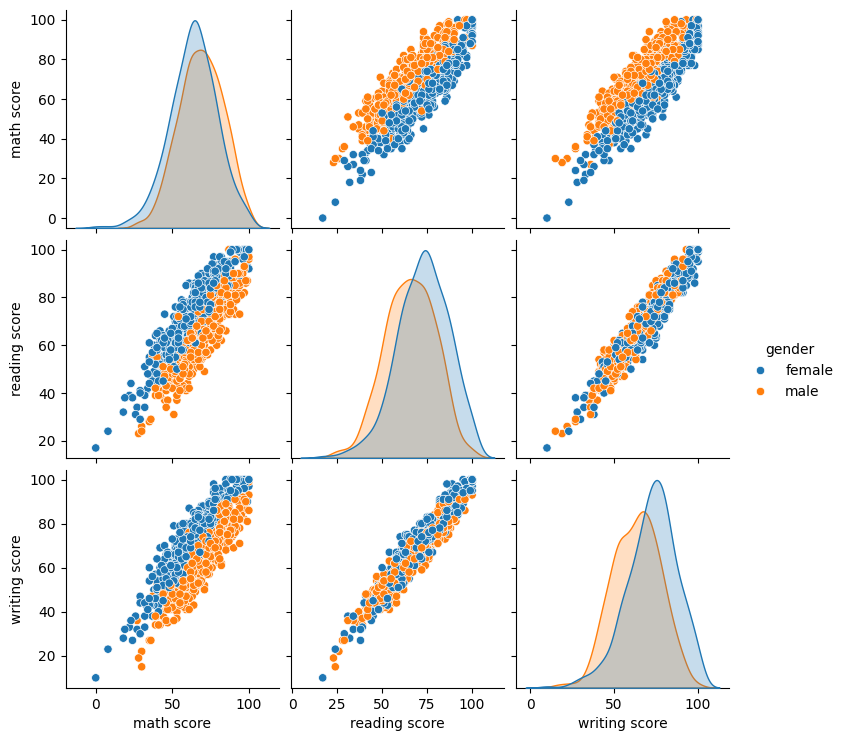

In [15]:
sns.pairplot(students_df, hue="gender")
plt.show()

#### Correlation Matrix

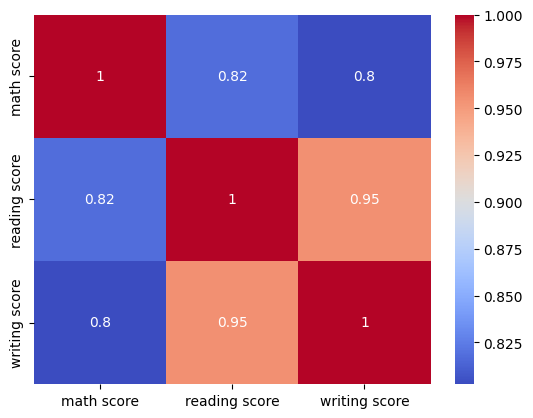

In [16]:
corr_matrix = students_df.iloc[:, -3:].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

### Multivariate Analysis

#### PCA

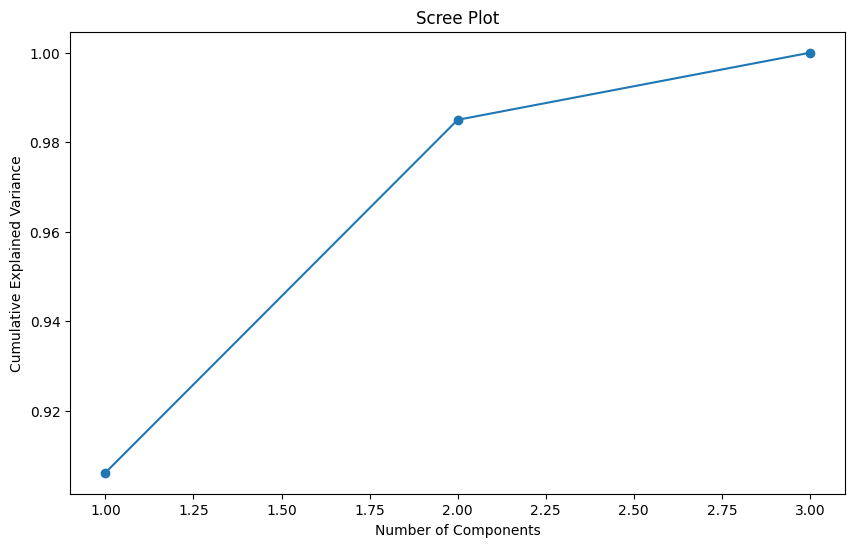

In [17]:
X = students_df.iloc[:, -3:]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pca = PCA()
principalComponents = pca.fit_transform(X_scaled)
plt.figure(figsize=(10, 6))

plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_.cumsum(), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Scree Plot')
plt.show()

#### K-Means Clustering

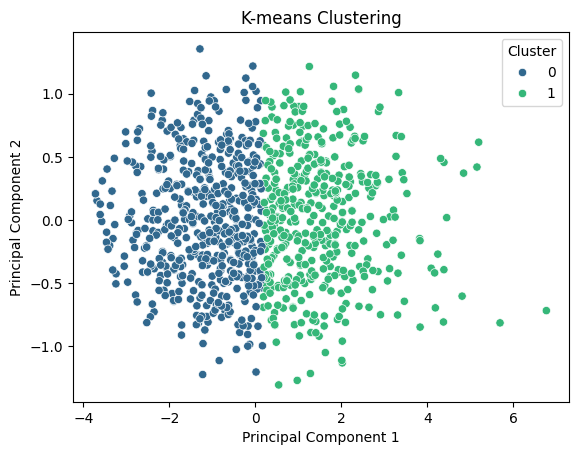

In [18]:
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_scaled)
students_df['Cluster'] = kmeans.labels_
sns.scatterplot(x=principalComponents[:, 0], y=principalComponents[:, 1], hue=students_df['Cluster'], palette='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-means Clustering')
plt.show()